# Breast Cancer Wisconsin Dataset Analysis and Machine Learning

In this notebook, we will analyze the Breast Cancer Wisconsin dataset and apply machine learning to predict if a tumor is malignant or benign. The steps will include data preprocessing, exploratory data analysis (EDA), and training a machine learning model.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Load the Breast Cancer Wisconsin Dataset

We'll load the dataset directly from the UCI Machine Learning Repository using the `pandas` library.

In [2]:
# Loading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = [
    'ID', 'Diagnosis', 'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean', 'Area_Mean', 'Smoothness_Mean',
    'Compactness_Mean', 'Concavity_Mean', 'Concave_Points_Mean', 'Symmetry_Mean', 'Fractal_Dimension_Mean',
    'Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE', 'Compactness_SE', 'Concavity_SE',
    'Concave_Points_SE', 'Symmetry_SE', 'Fractal_Dimension_SE', 'Radius_Worst', 'Texture_Worst',
    'Perimeter_Worst', 'Area_Worst', 'Smoothness_Worst', 'Compactness_Worst', 'Concavity_Worst',
    'Concave_Points_Worst', 'Symmetry_Worst', 'Fractal_Dimension_Worst'
]

data = pd.read_csv(url, names=column_names)
data.head()

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Preprocessing

Preprocessing is a crucial step in machine learning. We'll handle missing values, encode the target variable, and normalize numerical features.

In [3]:
# Dropping the ID column as it is not useful for analysis
data = data.drop(columns=['ID'])

# Encoding the target variable
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Normalizing numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Diagnosis', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[1:])
scaled_data['Diagnosis'] = data['Diagnosis'].values
scaled_data.head()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst,Diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


## Exploratory Data Analysis (EDA)

EDA helps us understand the data better. We'll look at summary statistics and visualize the data distribution and relationships.

In [4]:
# Summary statistics
scaled_data.describe()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst,Diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16,0.372583
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,0.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


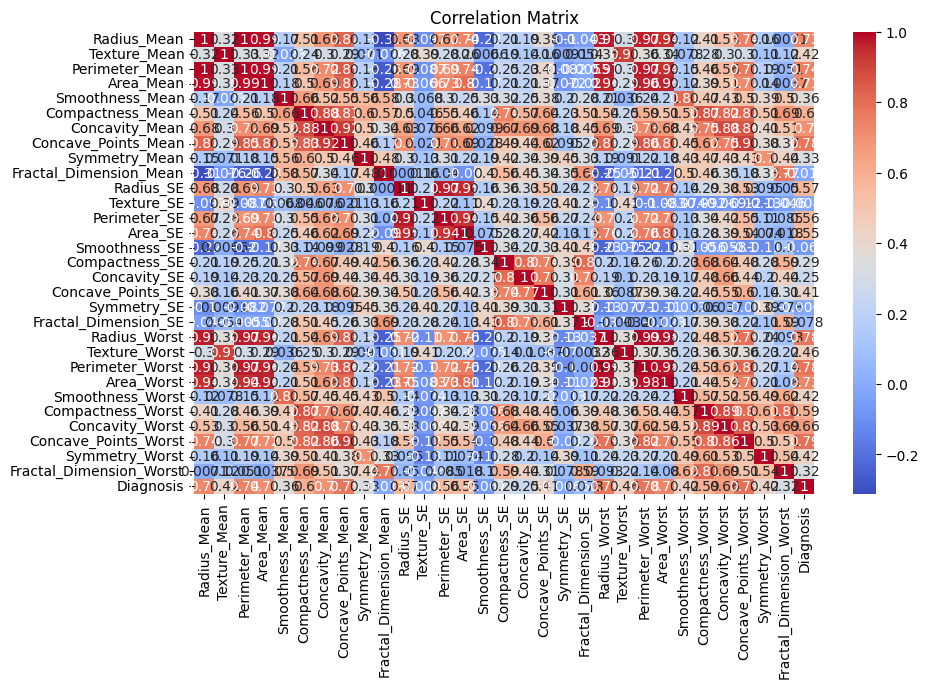

In [5]:
# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

Feature engineering involves creating new features from the existing ones. For simplicity, we'll assume our dataset is already well-featured.

In [ ]:
# No additional feature engineering for this dataset

## Machine Learning Model

We'll split the data into training and testing sets, then train a Random Forest classifier to predict the target variable.

In [6]:
# Splitting the data
X = scaled_data.drop('Diagnosis', axis=1)
y = scaled_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[70  1]
 [ 3 40]]


## Conclusion

In this notebook, we loaded the Breast Cancer Wisconsin dataset, performed data preprocessing, exploratory data analysis, and trained a Random Forest classifier to predict if a tumor is malignant or benign. The model's performance was evaluated using accuracy, classification report, and confusion matrix.

Future work could involve trying different machine learning models, tuning hyperparameters, and incorporating more advanced feature engineering techniques.